In [23]:
import pandas as pd
import numpy as np
from helpers import *
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Path
RAW = './data/raw/'
GOOGLE_MOBILITY = RAW+'Global_Mobility_Report.csv.gz'
APPLE_MOBILITY = RAW+'applemobilitytrends-2020-04-20.csv.gz'
INTERVENTIONS = RAW+'interventions.csv'
TOPICS = RAW+'topics_linked.csv.xz'
TIMESERIES = RAW+'aggregated_timeseries.json.gz'

In [9]:
google_mobility = pd.read_csv(GOOGLE_MOBILITY, compression="infer")
apple_mobility = pd.read_csv(APPLE_MOBILITY, compression="infer")
interventions = load_interventions(INTERVENTIONS)
topics_df, topics = load_topics(TOPICS)
agg = load_aggregated(TIMESERIES)

### Google Trends

In [20]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360) 

In [26]:
# query trend for e-book 
kw_list = ["e-book"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
data = pytrends.interest_over_time()
data = data.reset_index() 
data.head()

,date,e-book,isPartial
0,2018-11-25,0,False
1,2018-12-02,0,False
2,2018-12-09,0,False
3,2018-12-16,0,False
4,2018-12-23,0,False


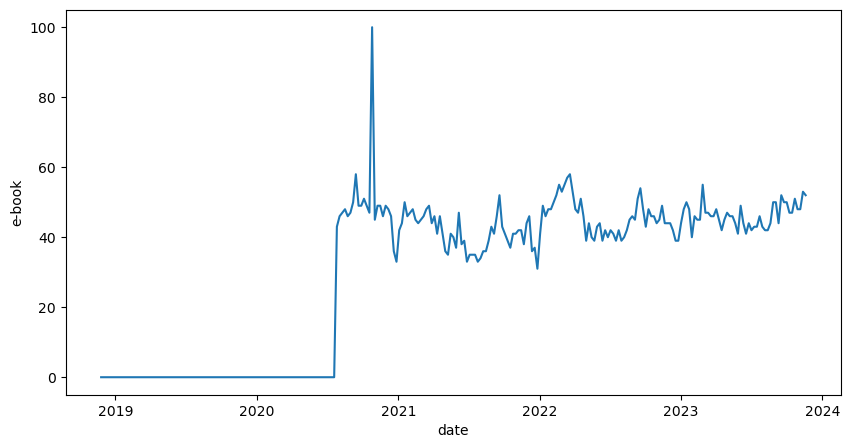

In [30]:
plt.figure(figsize=(10,5))
sns.lineplot(x=data['date'],y=data['e-book'])
plt.show() 

In [33]:
# related queries
data  = pytrends.related_queries()
data['e-book']['top'] 

,query,value
0,ebook,100
1,e-book pdf,96
2,book,80
3,e-book download,53
4,e-book free,44
5,e book,33
6,e-book reader,31
7,e-book online,30
8,kindle,30
9,e-book amazon,29


In [37]:
# keyword suggestions for query
keywords = pytrends.suggestions(keyword='e-book')
df = pd.DataFrame(keywords)
print(df)

             mid             title                     type
0      /m/01bcv7             ebook             Book binding
1  /g/11t90_89ry       Fourth Wing  Novel by Rebecca Yarros
2  /g/11sdpt8dwj  Haunting Adeline    Book by H. D. Carlton
3  /g/11sgbgjwnz           Bj Alex           Book by Mingwa
4  /g/11rn5nqpg0      Twisted Love        Book by Ana Huang


# wikipedia vs google trend for literature

In [41]:
# group wikipedia topics
categories = {
    'Biography': ['Culture.Biography.Biography*', 'Culture.Biography.Women'],
    'Culinary Arts': ['Culture.Food and drink'],
    'Internet and Online Culture': ['Culture.Internet culture'],
    'Linguistics': ['Culture.Linguistics'],
    'Literature': ['Culture.Literature', 'Culture.Media.Books'],
    'Entertainment': [
        'Culture.Media.Entertainment',
        'Culture.Media.Films',
        'Culture.Media.Music',
        'Culture.Media.Radio',
        'Culture.Media.Television',
        'Culture.Media.Video games'
    ],
    'Performing Arts': ['Culture.Performing arts'],
    'Philosophy and Religion': ['Culture.Philosophy and religion'],
    'Sports': ['Culture.Sports'],
    'Visual Arts': [
        'Culture.Visual arts.Architecture',
        'Culture.Visual arts.Comics and Anime',
        'Culture.Visual arts.Fashion',
        'Culture.Visual arts.Visual arts*'
    ],
    'Geographical Regions': [
        'Geography.Geographical',
        'Geography.Regions.Africa.Africa*',
        'Geography.Regions.Africa.Central Africa',
        'Geography.Regions.Africa.Eastern Africa',
        'Geography.Regions.Africa.Northern Africa',
        'Geography.Regions.Africa.Southern Africa',
        'Geography.Regions.Africa.Western Africa',
        'Geography.Regions.Americas.Central America',
        'Geography.Regions.Americas.North America',
        'Geography.Regions.Americas.South America',
        'Geography.Regions.Asia.Asia*',
        'Geography.Regions.Asia.Central Asia',
        'Geography.Regions.Asia.East Asia',
        'Geography.Regions.Asia.North Asia',
        'Geography.Regions.Asia.South Asia',
        'Geography.Regions.Asia.Southeast Asia',
        'Geography.Regions.Asia.West Asia',
        'Geography.Regions.Europe.Eastern Europe',
        'Geography.Regions.Europe.Europe*',
        'Geography.Regions.Europe.Northern Europe',
        'Geography.Regions.Europe.Southern Europe',
        'Geography.Regions.Europe.Western Europe',
        'Geography.Regions.Oceania'
    ],
    'History and Society': [
        'History and Society.Business and economics',
        'History and Society.Education',
        'History and Society.History',
        'History and Society.Military and warfare',
        'History and Society.Politics and government',
        'History and Society.Society',
        'History and Society.Transportation'
    ],
    'STEM': [
        'STEM.Biology',
        'STEM.Chemistry',
        'STEM.Computing',
        'STEM.Earth and environment',
        'STEM.Engineering',
        'STEM.Libraries & Information',
        'STEM.Mathematics',
        'STEM.Medicine & Health',
        'STEM.Physics',
        'STEM.STEM*',
        'STEM.Space',
        'STEM.Technology'
    ]
}

print(categories.keys())

dict_keys(['Biography', 'Culinary Arts', 'Internet and Online Culture', 'Linguistics', 'Literature', 'Entertainment', 'Performing Arts', 'Philosophy and Religion', 'Sports', 'Visual Arts', 'Geographical Regions', 'History and Society', 'STEM'])


In [71]:
literature = agg['en']['topics']['Culture.Literature']['sum']

# query trend for literature 
kw_list = ["literature"]
pytrends.build_payload(kw_list, cat=0, timeframe='2018-01-01 2020-07-31', geo='', gprop='')
data = pytrends.interest_over_time()
data = data.reset_index() 

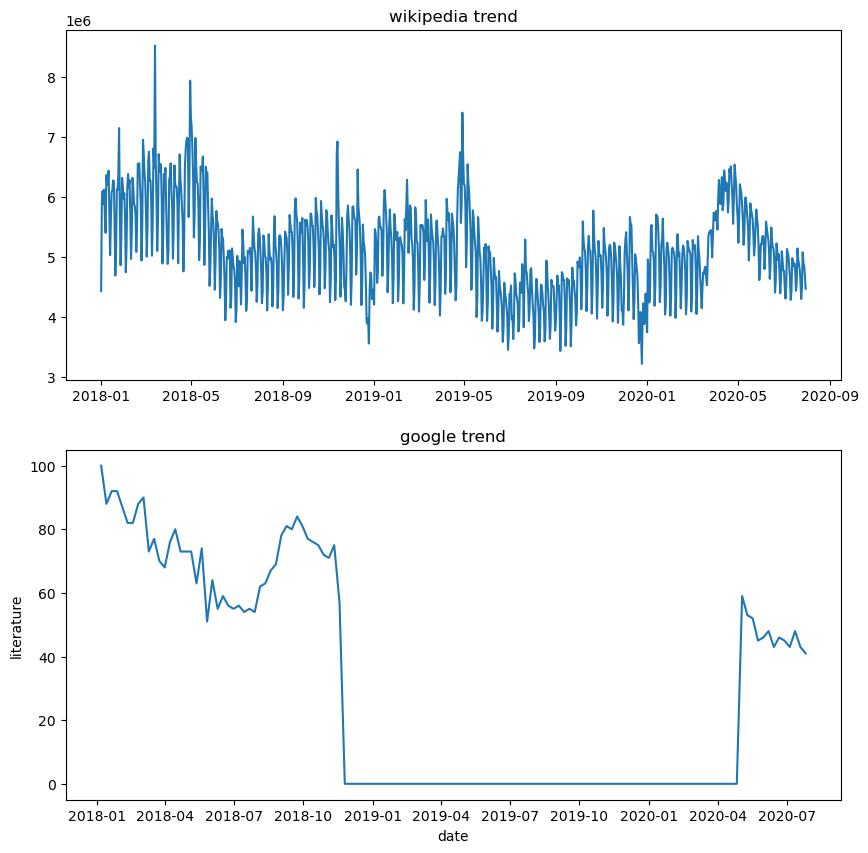

In [73]:
# makes no sense!
# who looks for "literature" on google!

fig,ax = plt.subplots(2,1,figsize=(10,10))

sns.lineplot(x=literature.index,y=literature.values,ax=ax[0]).set_title('wikipedia trend')
sns.lineplot(x=data['date'],y=data['literature'],ax=ax[1]).set_title('google trend')

plt.show() 